In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [155]:
data=pd.read_csv('/content/50_Startups.csv')

In [156]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# **Correlation Matrix**

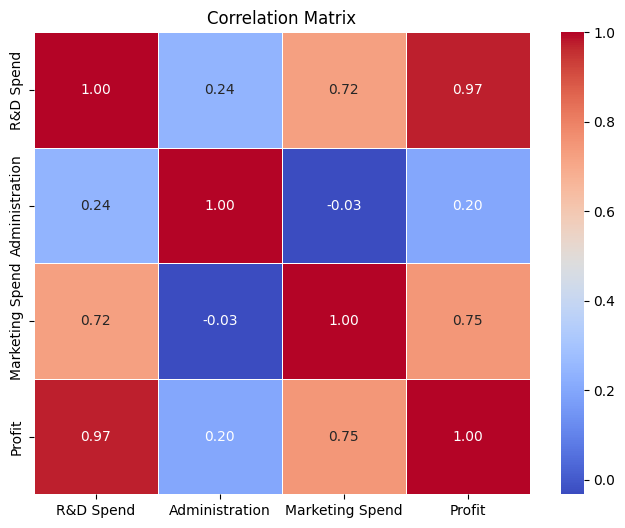

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Simple Linear Regression**

In [159]:
X = data[['R&D Spend']]
y = data['Profit']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
model = LinearRegression()

In [162]:
model.fit(X_train, y_train)

LinearRegression()

In [163]:
y_pred = model.predict(X_test)

In [164]:
print('The Intercept of the variable is:', model.intercept_)
print('The coefficient of the variable is:', model.coef_)

The Intercept of the variable is: 49336.6680379911
The coefficient of the variable is: [0.85360911]


In [165]:
r2 = r2_score(y_test, y_pred)

In [166]:
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9265108109341951


In [167]:
comparison_df = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred})
print(comparison_df.head())

    Actual Profit  Predicted Profit
13      134307.35     127862.209964
39       81005.76      82250.563346
30       99937.59     102255.720782
45       64926.08      50190.473476
17      125370.37     130136.881905


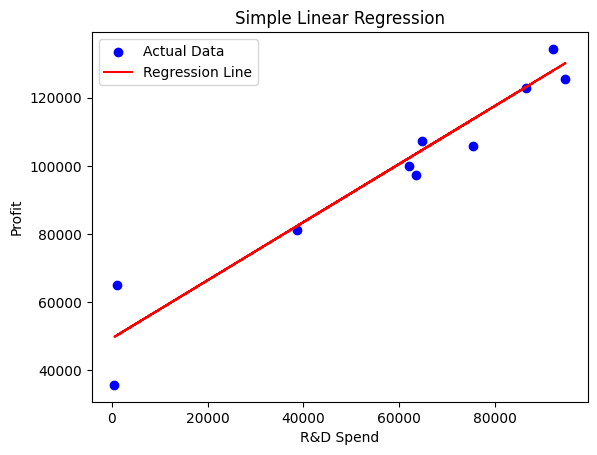

In [168]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# **Multiple Linear Regression**

In [169]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

In [170]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (50, 3)
Shape of y: (50,)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [173]:
y_pred1 = model1.predict(X_test)

In [177]:
print('The Intercept of the variable is:', model1.intercept_)
print('The coefficient of the variable is:', model1.coef_)

The Intercept of the variable is: 54071.87574599082
The coefficient of the variable is: [ 0.80377928 -0.06792917  0.03124155]


In [175]:
r2 = r2_score(y_test, y_pred1)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9000653083037321


In [176]:
comparison_df = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred1})
print(comparison_df.head())

    Actual Profit  Predicted Profit
13      134307.35     126703.027165
39       81005.76      84894.750816
30       99937.59      98893.418160
45       64926.08      46501.708150
17      125370.37     129128.397344


# **Inference of SLR:**

**Feature Selection:** R&D Spend was chosen as a predictor for Profit because of its high correlation (0.97) with Profit, indicating a strong relationship between the two variables.

**Intercept:** The model's intercept is 49336.67, meaning that when R&D Spend is zero, the predicted profit is 49336.67.

**Coefficient:** The coefficient of 0.85 means that for every 1 unit increase in R&D Spend, the Profit is expected to increase by 0.85 units.

**R-squared:** The R-squared value of 0.93 shows that 93% of the variation in Profit can be explained by R&D Spend, which indicates that the model is a strong fit for the data.

**Conclusion:**

The linear regression model suggests that increasing R&D Spend leads to a significant increase in Profit, and the model is highly reliable in predicting profit based on R&D investments.

# **Inference for MLR:**

**Intercept:** The model's intercept is 54071.88, meaning that when all predictor variables (R&D Spend, Administration, and Marketing Spend) are zero, the predicted profit is 54071.88.

**Coefficients:**

The coefficients for the variables are:

**0.80 for R&D Spend:** For each additional unit of R&D Spend, the profit is expected to increase by 0.80 units, holding other variables constant.

**-0.07 for Administration:** For each additional unit of Administration spend, profit is expected to decrease by 0.07 units, holding other variables constant.

**0.03 for Marketing Spend:** For each additional unit of Marketing Spend, profit is expected to increase by 0.03 units, holding other variables constant.

**R-squared:** The R-squared value of 0.90 indicates that 90% of the variation in Profit is explained by the predictor variables (R&D Spend, Administration, and Marketing Spend). This suggests that the model does a good job of explaining the relationship between the independent variables and Profit.

**Conclusion:**

The model shows that R&D Spend is still a strong predictor of profit, though Administration has a slight negative effect, and Marketing Spend has a smaller positive effect.

The R-squared value of 0.90 indicates a good fit, with the model explaining most of the variation in profit based on the three predictors. This suggests that multiple variables together provide a more comprehensive view of factors affecting profit.